In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

데이터 로드

In [268]:
df = pd.read_csv('../Dataset/SCF_20_20220826_C_001.csv', encoding='utf-8')


In [269]:
df.head()

,202203,11560620,117,8,6,Unnamed: 5,Unnamed: 6,7,1,2,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,3,Unnamed: 17,Unnamed: 18,Unnamed: 19,1.2,39,2022-08-25 15:43:13
0,202203,11560585,55,2.0,NaN,NaN,NaN,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,2022-08-25 15:43:13
1,202203,11560630,78,1.0,2.0,1.0,1.0,13.0,NaN,1.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,26,2022-08-25 15:43:13
2,202203,11590560,95,4.0,1.0,NaN,1.0,11.0,4.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36,2022-08-25 15:43:13
3,202203,11650600,95,3.0,4.0,NaN,1.0,10.0,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,19,2022-08-25 15:43:13
4,202203,11680740,57,3.0,3.0,NaN,NaN,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13,2022-08-25 15:43:13


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   202203               424 non-null    int64  
 1   11560620             424 non-null    int64  
 2   117                  424 non-null    int64  
 3   8                    423 non-null    float64
 4   6                    367 non-null    float64
 5   Unnamed: 5           52 non-null     float64
 6   Unnamed: 6           137 non-null    float64
 7   7                    422 non-null    float64
 8   1                    283 non-null    float64
 9   2                    360 non-null    float64
 10  1.1                  251 non-null    float64
 11  2.1                  206 non-null    float64
 12  Unnamed: 12          118 non-null    float64
 13  Unnamed: 13          9 non-null      float64
 14  Unnamed: 14          90 non-null     float64
 15  Unnamed: 15          2 non-null      flo

In [271]:
df.columns = ['STRD_YR_QTR_CD','ADSTRD_CD','VSTFC_FCLTY_CNT','PBOFC_CNT','BANK_CNT', 'GNHSP_CNT', 'HSPTL_CNT', 'PHRM_CNT', 'KNDGT_CNT', 'ELESCH_CNT', 'MSKUL_CNT', 'HGSCHL_CNT', 'UNVRS_CNT', 'DMST_CNT', 'SUPMK_CNT', 'THTER_CNT', 'ACMT_CNT', 'ARPRT_CNT', 'RLROAD_STATN_CNT', 'BUS_TMNL_CNT', 'SUBWAY_STATN_CNT', 'BUS_STATN_CNT', 'DW_RGSTN_DTM']

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STRD_YR_QTR_CD    424 non-null    int64  
 1   ADSTRD_CD         424 non-null    int64  
 2   VSTFC_FCLTY_CNT   424 non-null    int64  
 3   PBOFC_CNT         423 non-null    float64
 4   BANK_CNT          367 non-null    float64
 5   GNHSP_CNT         52 non-null     float64
 6   HSPTL_CNT         137 non-null    float64
 7   PHRM_CNT          422 non-null    float64
 8   KNDGT_CNT         283 non-null    float64
 9   ELESCH_CNT        360 non-null    float64
 10  MSKUL_CNT         251 non-null    float64
 11  HGSCHL_CNT        206 non-null    float64
 12  UNVRS_CNT         118 non-null    float64
 13  DMST_CNT          9 non-null      float64
 14  SUPMK_CNT         90 non-null     float64
 15  THTER_CNT         2 non-null      float64
 16  ACMT_CNT          100 non-null    float64
 1

데이터 전처리

In [273]:
df = df.drop(['DW_RGSTN_DTM', 'ACMT_CNT', 'STRD_YR_QTR_CD'], axis=1)
df

,ADSTRD_CD,VSTFC_FCLTY_CNT,PBOFC_CNT,BANK_CNT,GNHSP_CNT,HSPTL_CNT,PHRM_CNT,KNDGT_CNT,ELESCH_CNT,MSKUL_CNT,HGSCHL_CNT,UNVRS_CNT,DMST_CNT,SUPMK_CNT,THTER_CNT,ARPRT_CNT,RLROAD_STATN_CNT,BUS_TMNL_CNT,SUBWAY_STATN_CNT,BUS_STATN_CNT
0,11560585,55,2.0,NaN,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,11560630,78,1.0,2.0,1.0,1.0,13.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,26
2,11590560,95,4.0,1.0,NaN,1.0,11.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,36
3,11650600,95,3.0,4.0,NaN,1.0,10.0,NaN,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,19
4,11680740,57,3.0,3.0,NaN,NaN,6.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11530790,142,3.0,1.0,NaN,NaN,5.0,2.0,1.0,1.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,70
420,11560540,365,23.0,70.0,1.0,NaN,44.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,60
421,11590510,160,5.0,4.0,NaN,NaN,13.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,56
422,11560605,161,8.0,9.0,NaN,NaN,17.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,58


In [274]:
df = df.fillna(0)
df

,ADSTRD_CD,VSTFC_FCLTY_CNT,PBOFC_CNT,BANK_CNT,GNHSP_CNT,HSPTL_CNT,PHRM_CNT,KNDGT_CNT,ELESCH_CNT,MSKUL_CNT,HGSCHL_CNT,UNVRS_CNT,DMST_CNT,SUPMK_CNT,THTER_CNT,ARPRT_CNT,RLROAD_STATN_CNT,BUS_TMNL_CNT,SUBWAY_STATN_CNT,BUS_STATN_CNT
0,11560585,55,2.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28
1,11560630,78,1.0,2.0,1.0,1.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,26
2,11590560,95,4.0,1.0,0.0,1.0,11.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36
3,11650600,95,3.0,4.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,19
4,11680740,57,3.0,3.0,0.0,0.0,6.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11530790,142,3.0,1.0,0.0,0.0,5.0,2.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,70
420,11560540,365,23.0,70.0,1.0,0.0,44.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,60
421,11590510,160,5.0,4.0,0.0,0.0,13.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,56
422,11560605,161,8.0,9.0,0.0,0.0,17.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58


In [275]:
df.sort_values('ADSTRD_CD')

,ADSTRD_CD,VSTFC_FCLTY_CNT,PBOFC_CNT,BANK_CNT,GNHSP_CNT,HSPTL_CNT,PHRM_CNT,KNDGT_CNT,ELESCH_CNT,MSKUL_CNT,HGSCHL_CNT,UNVRS_CNT,DMST_CNT,SUPMK_CNT,THTER_CNT,ARPRT_CNT,RLROAD_STATN_CNT,BUS_TMNL_CNT,SUBWAY_STATN_CNT,BUS_STATN_CNT
61,11110515,91,6.0,3.0,0.0,0.0,4.0,1.0,1.0,2.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27
176,11110530,190,18.0,24.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,33
62,11110540,45,10.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
283,11110550,78,4.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
122,11110560,157,6.0,2.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,11740650,98,2.0,3.0,0.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15
60,11740660,125,4.0,5.0,0.0,0.0,13.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14
282,11740685,217,6.0,10.0,1.0,4.0,34.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32
375,11740690,14,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6


In [276]:
df['관공서_은행'] = df['PBOFC_CNT'] + df['BANK_CNT']
df['의료'] = df['GNHSP_CNT'] + df['HSPTL_CNT'] + df['PHRM_CNT']
df['쇼핑'] = df['DMST_CNT'] + df['SUPMK_CNT']
df['여가'] = df['THTER_CNT'] + 
df['교통'] = df['ARPRT_CNT'] + df['RLROAD_STATN_CNT'] + df['BUS_TMNL_CNT'] + df['SUBWAY_STATN_CNT'] + df['BUS_STATN_CNT']
df 

,ADSTRD_CD,VSTFC_FCLTY_CNT,PBOFC_CNT,BANK_CNT,GNHSP_CNT,HSPTL_CNT,PHRM_CNT,KNDGT_CNT,ELESCH_CNT,MSKUL_CNT,...,ARPRT_CNT,RLROAD_STATN_CNT,BUS_TMNL_CNT,SUBWAY_STATN_CNT,BUS_STATN_CNT,관공서_은행,의료,쇼핑,여가,교통
0,11560585,55,2.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,2.0,6.0,0.0,0.0,28.0
1,11560630,78,1.0,2.0,1.0,1.0,13.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,26,3.0,15.0,0.0,0.0,28.0
2,11590560,95,4.0,1.0,0.0,1.0,11.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,36,5.0,12.0,0.0,1.0,36.0
3,11650600,95,3.0,4.0,0.0,1.0,10.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,19,7.0,11.0,1.0,0.0,20.0
4,11680740,57,3.0,3.0,0.0,0.0,6.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,13,6.0,6.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11530790,142,3.0,1.0,0.0,0.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,3.0,70,4.0,5.0,1.0,0.0,73.0
420,11560540,365,23.0,70.0,1.0,0.0,44.0,0.0,2.0,2.0,...,0.0,0.0,0.0,5.0,60,93.0,45.0,0.0,0.0,65.0
421,11590510,160,5.0,4.0,0.0,0.0,13.0,2.0,3.0,1.0,...,0.0,0.0,0.0,3.0,56,9.0,13.0,0.0,0.0,59.0
422,11560605,161,8.0,9.0,0.0,0.0,17.0,0.0,3.0,2.0,...,0.0,0.0,0.0,1.0,58,17.0,17.0,0.0,0.0,59.0


In [277]:
df.columns

Index(['ADSTRD_CD', 'VSTFC_FCLTY_CNT', 'PBOFC_CNT', 'BANK_CNT', 'GNHSP_CNT',
       'HSPTL_CNT', 'PHRM_CNT', 'KNDGT_CNT', 'ELESCH_CNT', 'MSKUL_CNT',
       'HGSCHL_CNT', 'UNVRS_CNT', 'DMST_CNT', 'SUPMK_CNT', 'THTER_CNT',
       'ARPRT_CNT', 'RLROAD_STATN_CNT', 'BUS_TMNL_CNT', 'SUBWAY_STATN_CNT',
       'BUS_STATN_CNT', '관공서_은행', '의료', '쇼핑', '여가', '교통'],
      dtype='object')

In [304]:
df_x = df.drop(['ADSTRD_CD', 'PBOFC_CNT', 'BANK_CNT', 'GNHSP_CNT',
       'HSPTL_CNT', 'PHRM_CNT', 'KNDGT_CNT', 'ELESCH_CNT', 'MSKUL_CNT',
       'HGSCHL_CNT', 'UNVRS_CNT', 'DMST_CNT', 'SUPMK_CNT', 'THTER_CNT',
       'ARPRT_CNT', 'RLROAD_STATN_CNT', 'BUS_TMNL_CNT', 'SUBWAY_STATN_CNT',
       'BUS_STATN_CNT','쇼핑', '여가'], axis=1)
df_x

,VSTFC_FCLTY_CNT,관공서_은행,의료,교통,cluster_id
0,55,2.0,6.0,28.0,3
1,78,3.0,15.0,28.0,3
2,95,5.0,12.0,36.0,0
3,95,7.0,11.0,20.0,0
4,57,6.0,6.0,14.0,3
...,...,...,...,...,...
419,142,4.0,5.0,73.0,4
420,365,93.0,45.0,65.0,1
421,160,9.0,13.0,59.0,4
422,161,17.0,17.0,59.0,4


In [305]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(df_x)

In [306]:
pd.DataFrame(data_scaled).describe().round(2)

,0,1,2,3,4
count,424.00,424.00,424.00,424.00,424.00
mean,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.53,-0.98,-1.49,-1.60,-1.33
25%,-0.67,-0.54,-0.76,-0.72,-1.33
50%,-0.23,-0.32,-0.15,-0.16,0.58
75%,0.40,0.11,0.33,0.44,0.58
max,6.38,9.14,6.78,4.37,1.21


행정동 데이터 전처리

In [133]:
district_name = pd.read_excel('../Dataset/한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx', header=2, sheet_name='1. 총괄표(현행)')


In [134]:
district_name

,Unnamed: 0,대분류,시도,중분류,시군구,소분류,읍면동,영문 표기,한자 표기
0,NaN,11.0,서울특별시,NaN,NaN,NaN,NaN,Seoul,서울特別市
1,NaN,11.0,서울특별시,11010.0,종로구,NaN,NaN,Jongno-gu,鐘路區
2,NaN,11.0,서울특별시,11010.0,종로구,1101053.0,사직동,Sajik-dong,社稷洞
3,NaN,11.0,서울특별시,11010.0,종로구,1101054.0,삼청동,Samcheong-dong,三淸洞
4,NaN,11.0,서울특별시,11010.0,종로구,1101055.0,부암동,Buam-dong,付岩洞
...,...,...,...,...,...,...,...,...,...
3787,NaN,39.0,제주특별자치도,39020.0,서귀포시,3902058.0,서홍동,Seohong-dong,西烘洞
3788,NaN,39.0,제주특별자치도,39020.0,서귀포시,3902059.0,대륜동,Daeryun-dong,大倫洞
3789,NaN,39.0,제주특별자치도,39020.0,서귀포시,3902060.0,대천동,Daecheon-dong,大川洞
3790,NaN,39.0,제주특별자치도,39020.0,서귀포시,3902061.0,중문동,Jungmun-dong,中文洞


In [135]:
district_name = district_name[district_name['시도'] == '서울특별시']
district_name

,Unnamed: 0,대분류,시도,중분류,시군구,소분류,읍면동,영문 표기,한자 표기
0,NaN,11.0,서울특별시,NaN,NaN,NaN,NaN,Seoul,서울特別市
1,NaN,11.0,서울특별시,11010.0,종로구,NaN,NaN,Jongno-gu,鐘路區
2,NaN,11.0,서울특별시,11010.0,종로구,1101053.0,사직동,Sajik-dong,社稷洞
3,NaN,11.0,서울특별시,11010.0,종로구,1101054.0,삼청동,Samcheong-dong,三淸洞
4,NaN,11.0,서울특별시,11010.0,종로구,1101055.0,부암동,Buam-dong,付岩洞
...,...,...,...,...,...,...,...,...,...
447,NaN,11.0,서울특별시,11250.0,강동구,1125070.0,둔촌1동,Dunchon 1(il)-dong,遁村1洞
448,NaN,11.0,서울특별시,11250.0,강동구,1125071.0,둔촌2동,Dunchon 2(i)-dong,遁村2洞
449,NaN,11.0,서울특별시,11250.0,강동구,1125072.0,암사1동,Amsa 1(il)-dong,岩寺1洞
450,NaN,11.0,서울특별시,11250.0,강동구,1125073.0,천호2동,Cheonho 2(i)-dong,千戶2洞


In [136]:
district_name = district_name.drop(['Unnamed: 0', '시도', '대분류', '중분류', '영문 표기', '한자 표기'], axis=1)
district_name

,시군구,소분류,읍면동
0,NaN,NaN,NaN
1,종로구,NaN,NaN
2,종로구,1101053.0,사직동
3,종로구,1101054.0,삼청동
4,종로구,1101055.0,부암동
...,...,...,...
447,강동구,1125070.0,둔촌1동
448,강동구,1125071.0,둔촌2동
449,강동구,1125072.0,암사1동
450,강동구,1125073.0,천호2동


In [137]:
district_name = district_name.dropna()
district_name

,시군구,소분류,읍면동
2,종로구,1101053.0,사직동
3,종로구,1101054.0,삼청동
4,종로구,1101055.0,부암동
5,종로구,1101056.0,평창동
6,종로구,1101057.0,무악동
...,...,...,...
447,강동구,1125070.0,둔촌1동
448,강동구,1125071.0,둔촌2동
449,강동구,1125072.0,암사1동
450,강동구,1125073.0,천호2동


In [138]:
district_name['소분류'] = district_name['소분류'].astype('int64')
district_name

/var/folders/gz/2110lwqd6_n2vrd5_jvwgqmw0000gn/T/ipykernel_62013/784981726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_name['소분류'] = district_name['소분류'].astype('int64')


,시군구,소분류,읍면동
2,종로구,1101053,사직동
3,종로구,1101054,삼청동
4,종로구,1101055,부암동
5,종로구,1101056,평창동
6,종로구,1101057,무악동
...,...,...,...
447,강동구,1125070,둔촌1동
448,강동구,1125071,둔촌2동
449,강동구,1125072,암사1동
450,강동구,1125073,천호2동


In [149]:
district_name = district_name.rename(columns={'소분류' : 'ADSTRD_CD'})
district_name

,시군구,ADSTRD_CD,읍면동
2,종로구,1101053,사직동
3,종로구,1101054,삼청동
4,종로구,1101055,부암동
5,종로구,1101056,평창동
6,종로구,1101057,무악동
...,...,...,...
447,강동구,1125070,둔촌1동
448,강동구,1125071,둔촌2동
449,강동구,1125072,암사1동
450,강동구,1125073,천호2동


집객시설 데이터에 행정동 이름 합치기

In [153]:
df.merge(district_name, on='ADSTRD_CD')

,ADSTRD_CD,VSTFC_FCLTY_CNT,PBOFC_CNT,BANK_CNT,GNHSP_CNT,HSPTL_CNT,PHRM_CNT,KNDGT_CNT,ELESCH_CNT,MSKUL_CNT,...,DMST_CNT,SUPMK_CNT,THTER_CNT,ARPRT_CNT,RLROAD_STATN_CNT,BUS_TMNL_CNT,SUBWAY_STATN_CNT,BUS_STATN_CNT,시군구,읍면동


K-Means Clustering 학습

In [279]:
from sklearn.cluster import KMeans

In [300]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [307]:
km.fit_transform(df_x)
km.labels_

array([1, 1, 4, 4, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 0, 4, 1, 1, 2, 1, 0, 4,
       0, 0, 4, 1, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 2, 0, 1, 1, 0, 4, 1,
       1, 4, 4, 1, 1, 4, 1, 3, 0, 2, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 0, 1,
       1, 4, 1, 4, 4, 2, 2, 1, 4, 0, 4, 4, 0, 4, 1, 1, 4, 4, 1, 4, 1, 0,
       0, 4, 1, 1, 1, 0, 1, 4, 4, 1, 0, 1, 4, 1, 4, 4, 0, 4, 1, 4, 4, 0,
       2, 4, 4, 3, 4, 0, 1, 1, 1, 1, 4, 4, 0, 3, 2, 1, 0, 4, 0, 4, 1, 4,
       4, 4, 0, 1, 4, 1, 4, 0, 4, 1, 4, 0, 1, 4, 1, 1, 1, 0, 3, 4, 1, 1,
       4, 0, 2, 4, 1, 4, 0, 1, 1, 1, 4, 1, 0, 0, 0, 1, 1, 4, 4, 1, 4, 4,
       0, 4, 2, 1, 1, 1, 4, 1, 1, 1, 4, 4, 0, 4, 1, 4, 1, 4, 4, 2, 1, 1,
       1, 4, 4, 2, 3, 4, 4, 1, 4, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 2, 4, 2,
       4, 4, 4, 1, 1, 4, 1, 0, 4, 1, 1, 4, 4, 0, 4, 0, 4, 1, 4, 1, 4, 0,
       4, 4, 0, 1, 1, 4, 0, 1, 1, 1, 1, 1, 4, 1, 0, 1, 0, 1, 1, 4, 0, 1,
       0, 4, 4, 1, 2, 4, 4, 2, 0, 0, 4, 0, 1, 0, 1, 1, 1, 4, 2, 1, 1, 1,
       1, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 0, 4, 4, 1,

In [302]:
df['cluster_id'] = km.labels_
df[['ADSTRD_CD','cluster_id']]

,ADSTRD_CD,cluster_id
0,11560585,3
1,11560630,3
2,11590560,0
3,11650600,0
4,11680740,3
...,...,...
419,11530790,4
420,11560540,1
421,11590510,4
422,11560605,4


In [283]:
print(km.cluster_centers_)

[[6.31314286e+01 4.84000000e+00 7.02285714e+00 2.68571429e-01
  0.00000000e+00 1.92285714e+01]
 [1.64733333e+02 1.17066667e+01 1.68933333e+01 5.46666667e-01
  0.00000000e+00 4.66133333e+01]
 [3.96285714e+02 5.47142857e+01 4.04285714e+01 2.85714286e-01
  0.00000000e+00 6.50000000e+01]
 [1.10718310e+02 8.17605634e+00 1.23661972e+01 4.64788732e-01
  1.40845070e-02 3.20422535e+01]
 [2.42400000e+02 2.14000000e+01 2.66000000e+01 1.28000000e+00
  0.00000000e+00 5.04800000e+01]]


/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


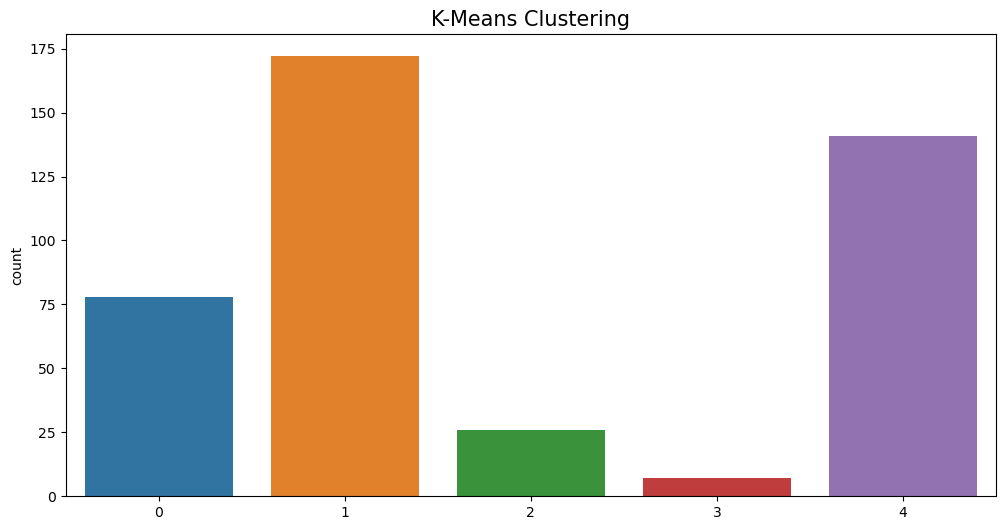

In [308]:
plt.figure(figsize=(12, 6))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [285]:
score = silhouette_score(df_x, km.labels_)
score

0.4309051437376936

In [193]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43347057260791877


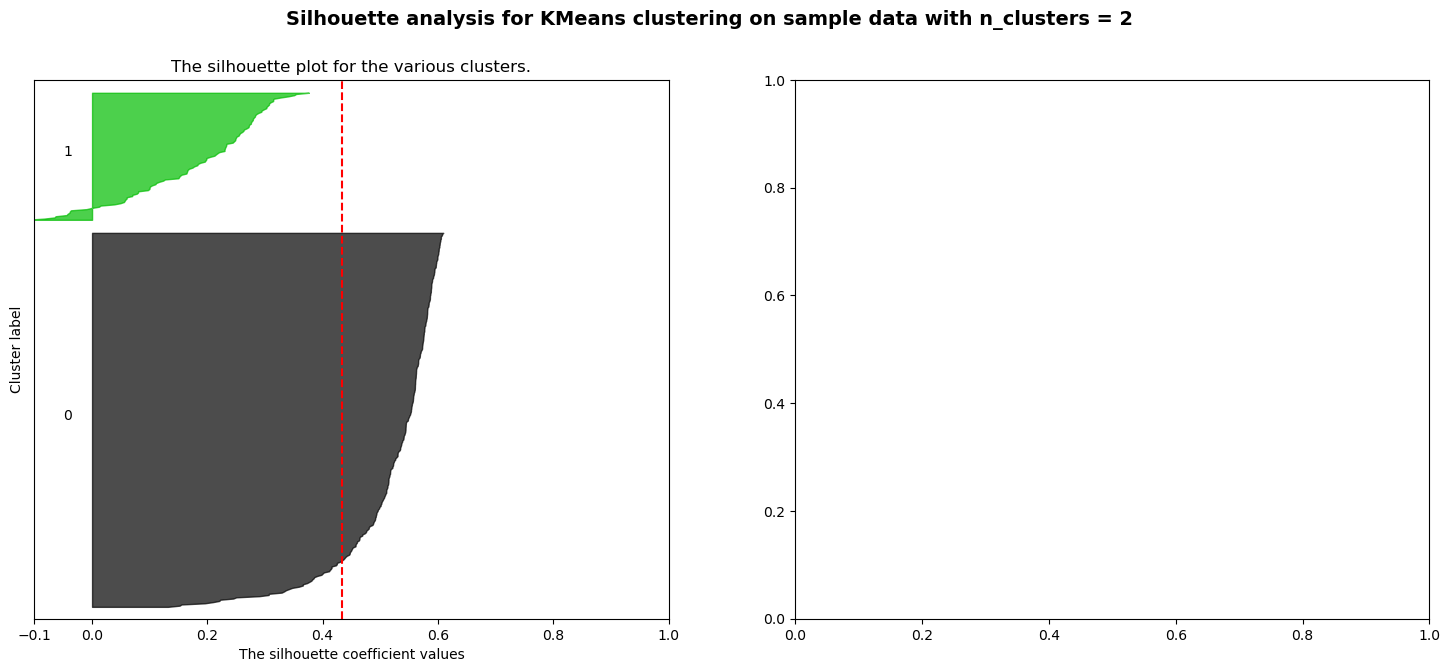

For n_clusters = 3 The average silhouette_score is : 0.4449421317738656


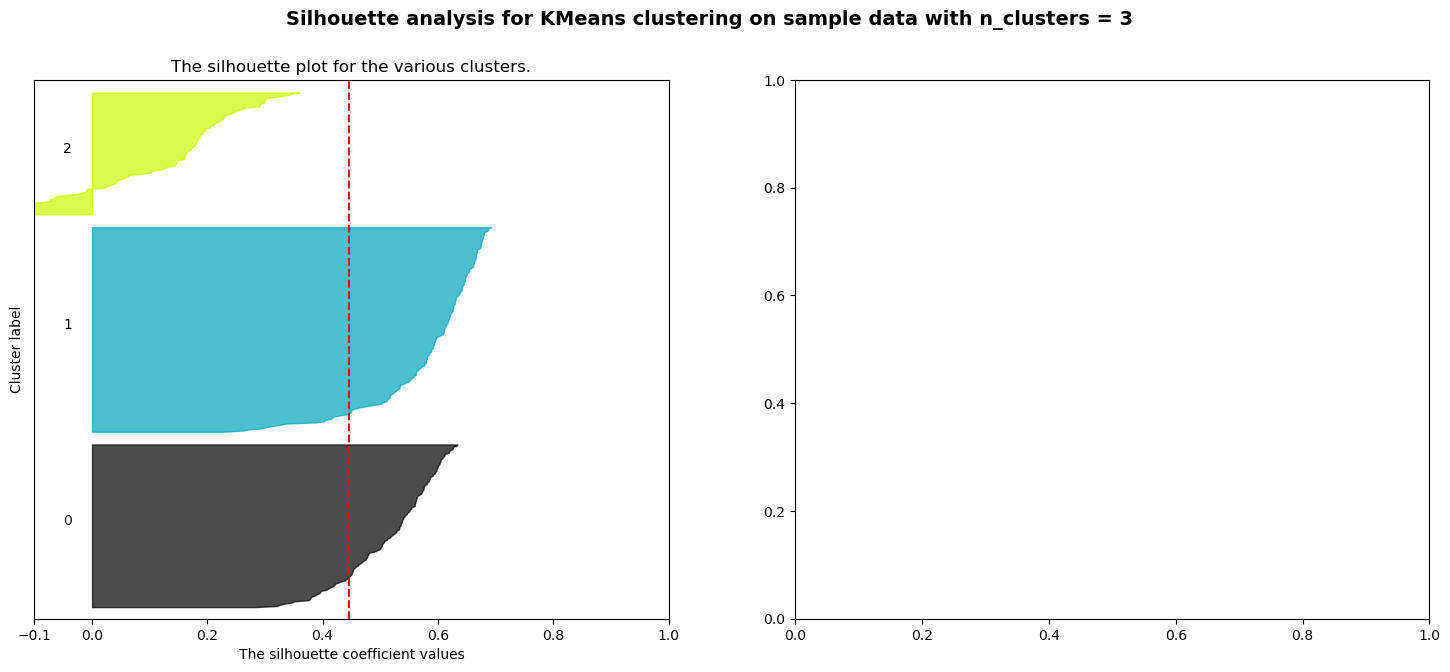

For n_clusters = 4 The average silhouette_score is : 0.4704650382646848


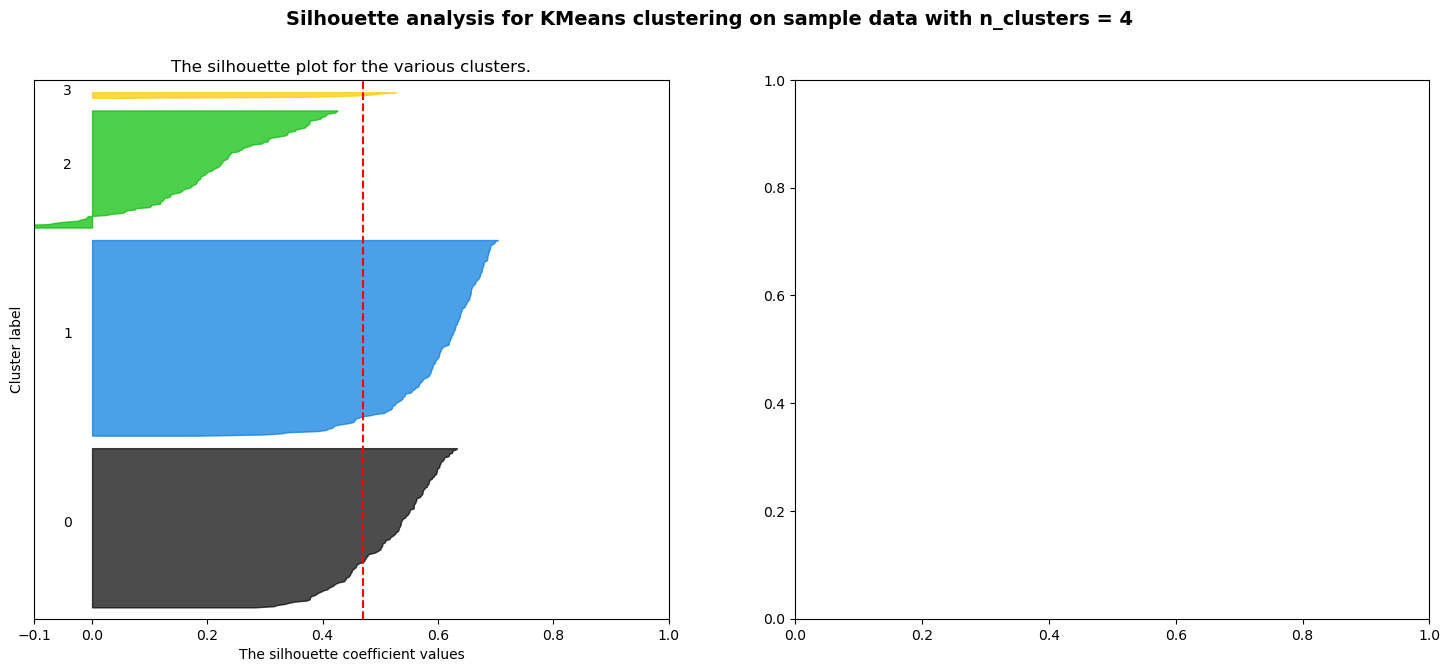

For n_clusters = 5 The average silhouette_score is : 0.488095637242966


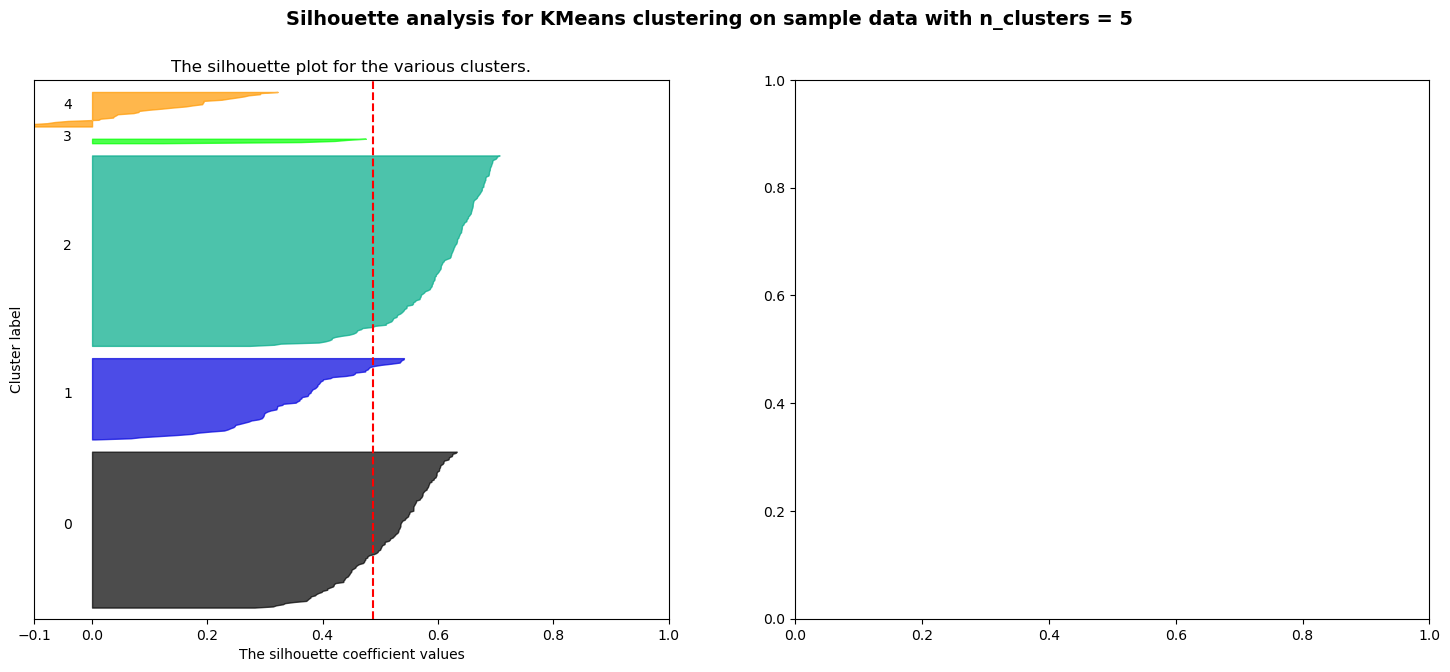

For n_clusters = 6 The average silhouette_score is : 0.49138280489161223


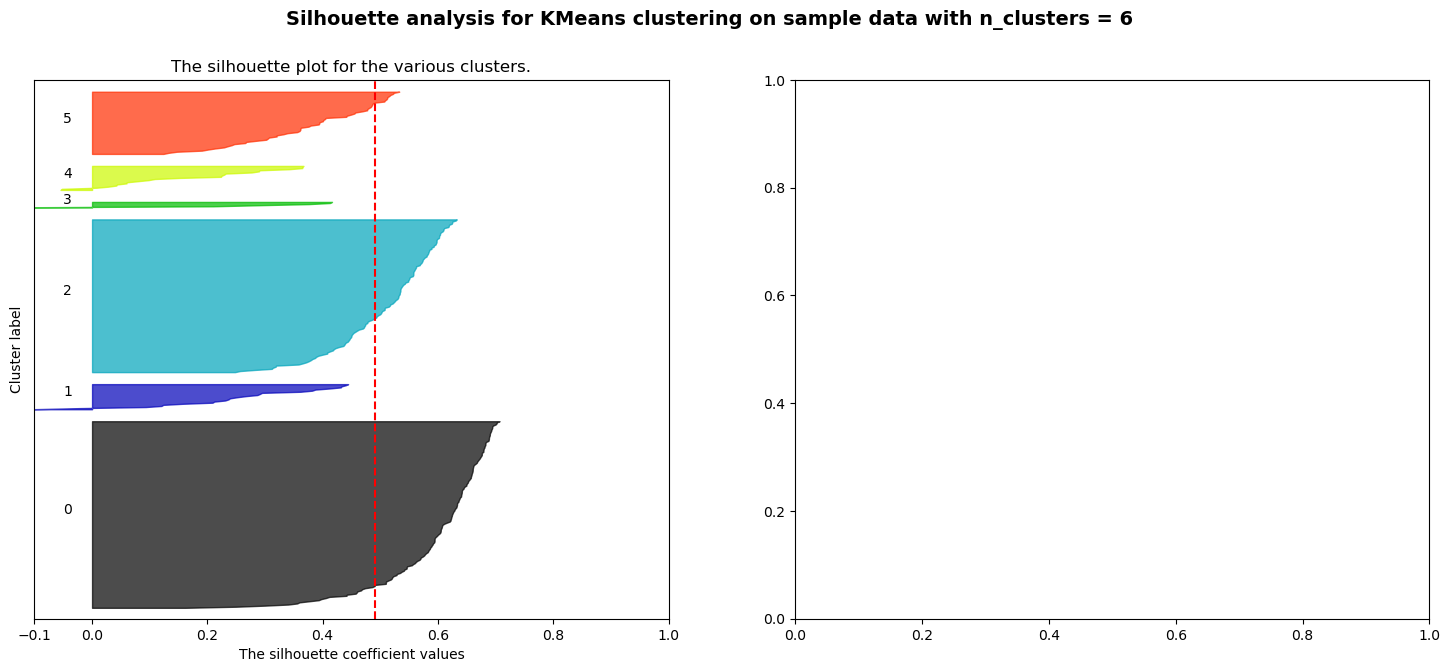

For n_clusters = 7 The average silhouette_score is : 0.4129322296125165


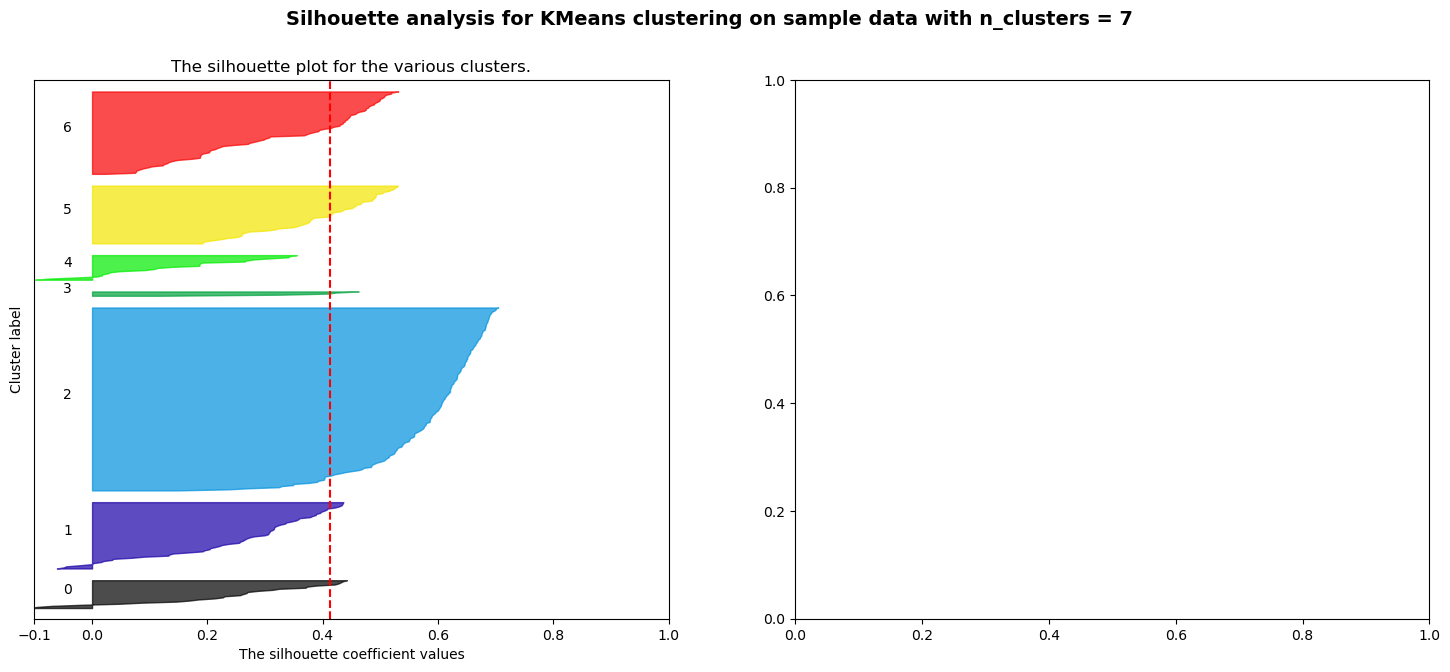

For n_clusters = 8 The average silhouette_score is : 0.4198175147432468


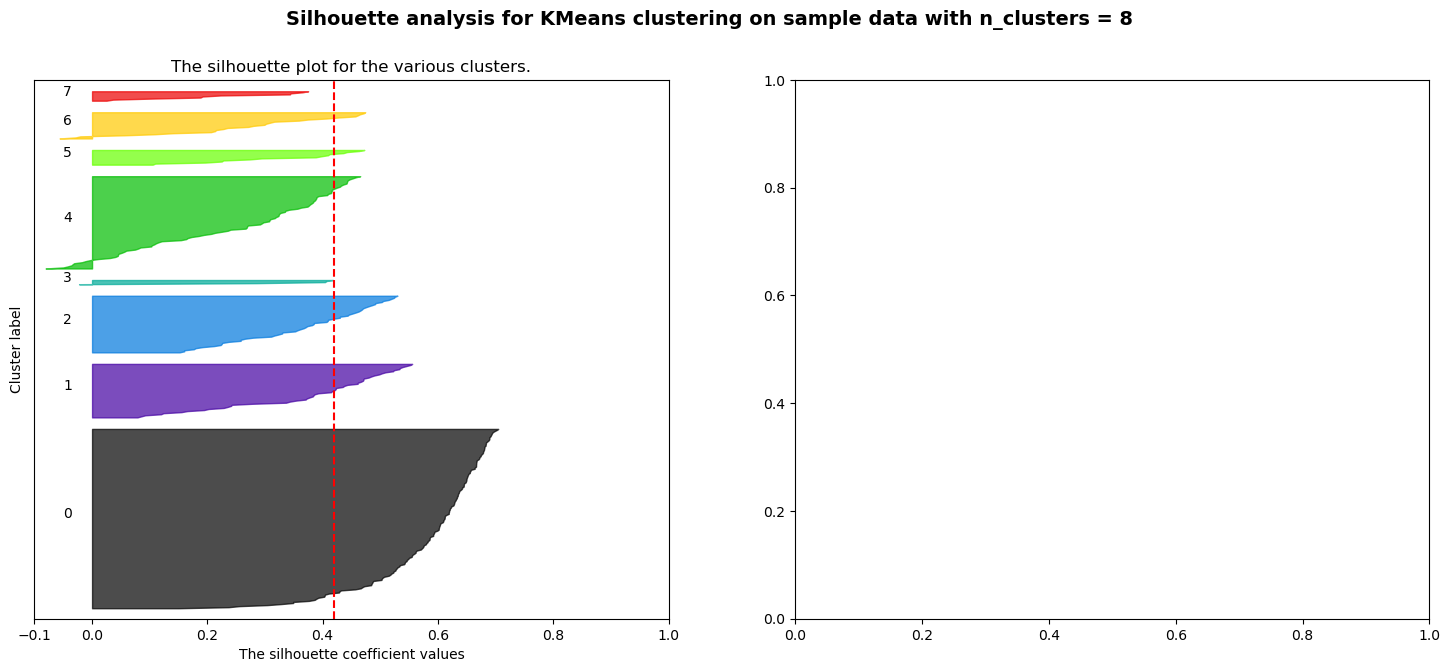

For n_clusters = 9 The average silhouette_score is : 0.42101754163591004


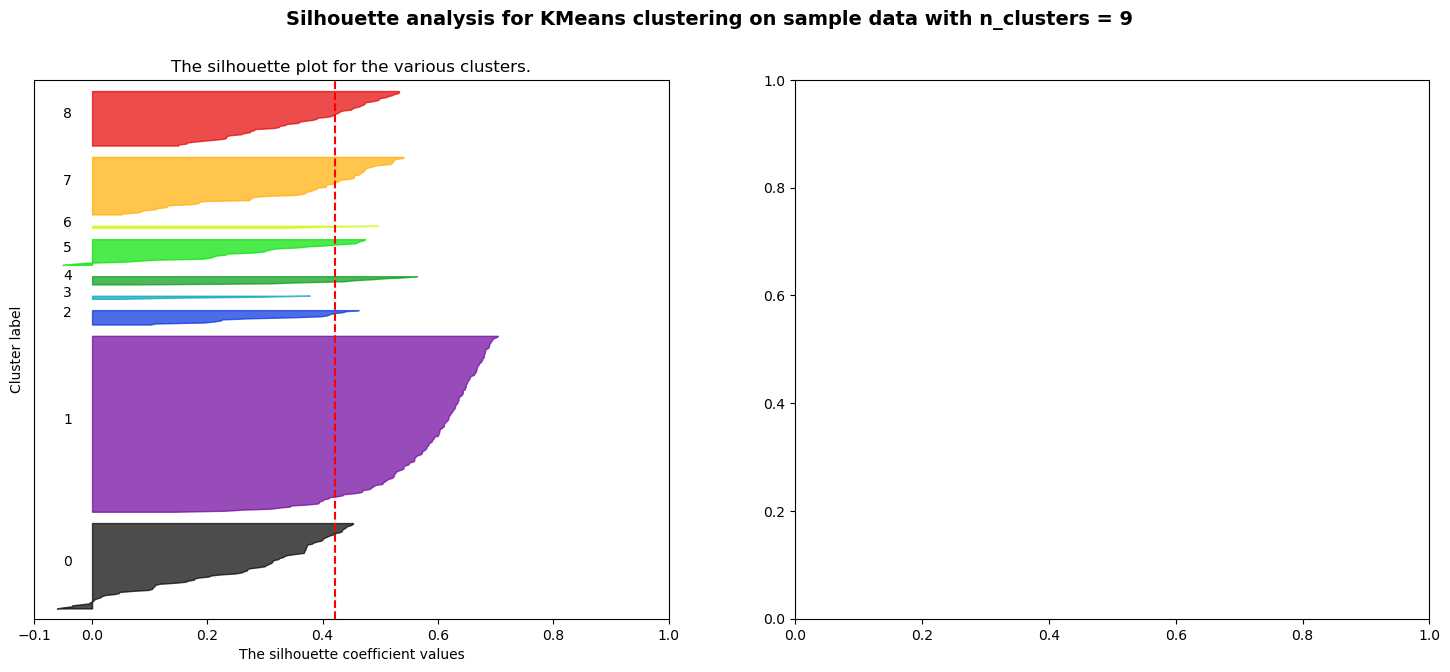

For n_clusters = 10 The average silhouette_score is : 0.2997225995145961


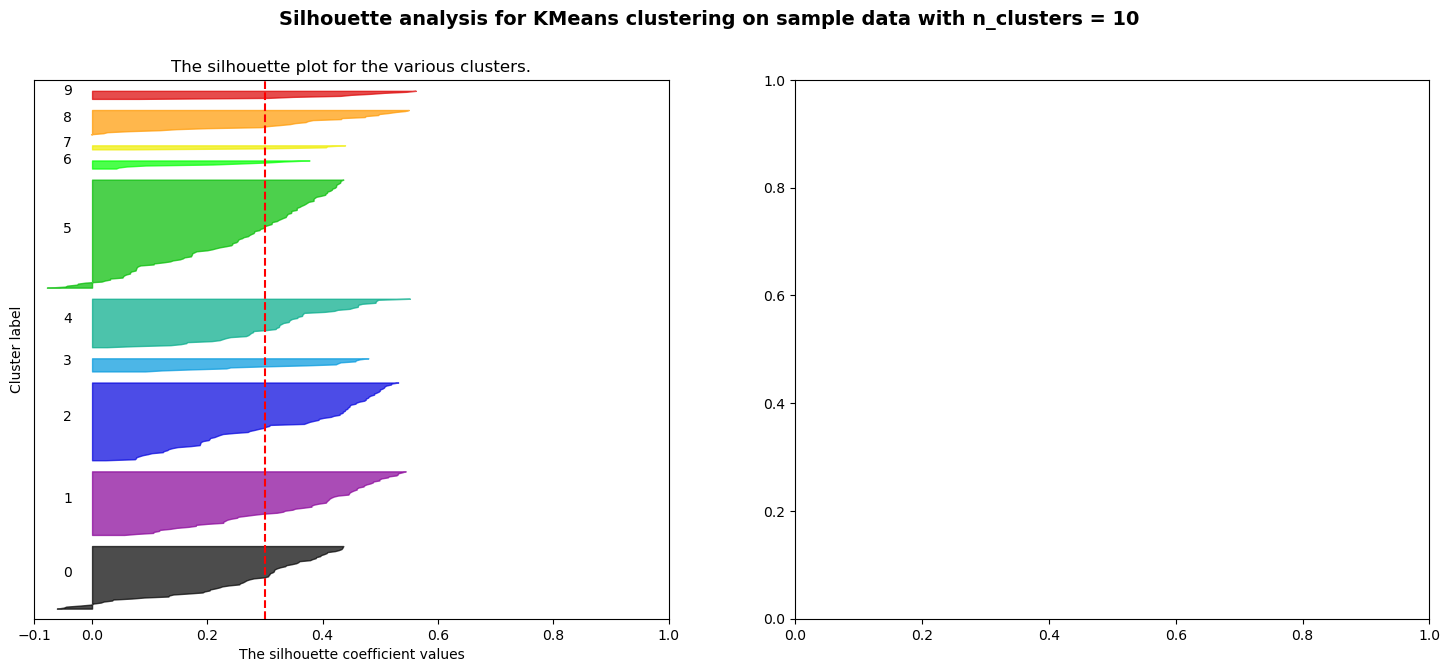

In [310]:
plot_silhouette(data_scaled, [2,3,4,5,6,7,8,9,10])

In [154]:
from sklearn.cluster import DBSCAN

In [296]:
# eps= : 반경에 해당하는 파라미터, 반경이 넓어지면 군집갯수가 작아진다. 작게하면 많아진다.
# min_samples= : 반경 안네 min_samples개 이상의 데이터가 들어왔을 때 하나의 그룹으로 인정할지의 여부
#dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan = DBSCAN(eps=40, min_samples=2)
# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(df_x)

dbscan_data

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [297]:
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
db_pred.value_counts() 

dbscan2_label
 0               416
-1                 6
 1                 2
dtype: int64

In [161]:
silhouette_score(df, dbscan_data)

0.39311142163135315